In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [141]:
df = pd.read_csv("CarpriceIndia.csv")

In [142]:
df.head()

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine_CC,Power_bhp,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1582.0,126.20,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1199.0,88.70,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1248.0,88.76,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,1968.0,140.80,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,1461.0,63.10,3.50


## Goals Utama adalah Meningkatkan Sales atau Revenue dan Meningkatkan Efisiensi dan Efektifitas Operasional Perusahaan

Business Question:
1. Bagaimana Pola Penjualan Mobil di India?
2. Brand apa yang paling diminati dan mobil dengan tahun produksi yang banyak diminati?
3. Apakah mobil yang dijual dalam harga yang wajar?
4. Apakah brand dan jarak tempuh memengaruhi penjualan?
5. Tipe mobil dengan mobil apa yang paling diminati?

In [143]:
df['index'] = range(1, len(df) + 1)
df

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine_CC,Power_bhp,Price,index
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1582.0,126.20,12.50,1
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1199.0,88.70,4.50,2
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1248.0,88.76,6.00,3
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,1968.0,140.80,17.74,4
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,1461.0,63.10,3.50,5
...,...,...,...,...,...,...,...,...,...,...,...
5948,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,1248.0,74.00,4.75,5949
5949,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,1120.0,71.00,4.00,5950
5950,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,2498.0,112.00,2.90,5951
5951,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,998.0,67.10,2.65,5952


In [144]:
def isi_cocok(x,y,z):
    hasil = []
    for i in range(len(x)):
        if x[y].isna().iloc[i]:
            berhasil = False
            for j in range(len(x)):
                if x[z].iloc[i] == x[z].iloc[j] and x[y].isna().iloc[j] == False:
                    hasil.append(x[y].iloc[j])
                    berhasil = True
                    break
            if berhasil == False:
                hasil.append(x[y].iloc[i])
        else:
            hasil.append(x[y].iloc[i])
    return hasil

In [151]:
CC_new = isi_cocok(df,"Engine_CC","Name")

In [152]:
df["CC_New"] = CC_new

In [153]:
df

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine_CC,Power_bhp,Price,index,CC_New
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1582.0,126.20,12.50,1,1582.0
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1199.0,88.70,4.50,2,1199.0
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1248.0,88.76,6.00,3,1248.0
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,1968.0,140.80,17.74,4,1968.0
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,1461.0,63.10,3.50,5,1461.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5948,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,1248.0,74.00,4.75,5949,1248.0
5949,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,1120.0,71.00,4.00,5950,1120.0
5950,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,2498.0,112.00,2.90,5951,2498.0
5951,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,998.0,67.10,2.65,5952,998.0


In [154]:
df[df['CC_New'].isnull()].index

Int64Index([], dtype='int64')

In [149]:
df["Engine_CC"].loc[205] = 1298.0
df["Engine_CC"].loc[744] = 2926.0
df["Engine_CC"].loc[1282] = 1339.0
df["Engine_CC"].loc[1314] = 1298.0
df["Engine_CC"].loc[1282] = 1298.0
df["Engine_CC"].loc[1445] = 4999.0
df["Engine_CC"].loc[2054] = 1298.0
df["Engine_CC"].loc[1282] = 1298.0
df["Engine_CC"].loc[2076] = 999.0
df["Engine_CC"].loc[2301] = 1298.0
df["Engine_CC"].loc[2499] = 1995.0
df["Engine_CC"].loc[2747] = 999.0
df["Engine_CC"].loc[2704] = 1061.0
df["Engine_CC"].loc[3763] = 2356.0
df["Engine_CC"].loc[3962] = 1248.0
df["Engine_CC"].loc[4644] = 1172.0
df["Engine_CC"].loc[4897] = 1368.0
df["Engine_CC"].loc[4178] = 1086.0

In [155]:
df[df["CC_New"].isnull()]

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine_CC,Power_bhp,Price,index,CC_New


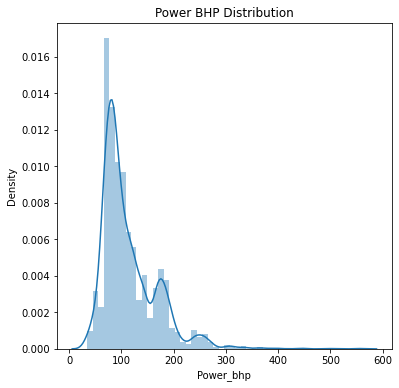

In [156]:
plt.figure(figsize=(6,6))
sns.distplot(df["Power_bhp"])
plt.title('Power BHP Distribution')
plt.show()

In [17]:
# Karana dia Skewed maka data Power BHP yang bernilai null atau kosong kita isi dengan nilai median dari power bhp

In [157]:
df["Power_bhp"] = df["Power_bhp"].fillna(df["Power_bhp"].median())

In [158]:
# Check Missing Value
# Missing Value on Engine_CC and Power_bhp
df.isna().any()

ID                   False
Name                 False
Location             False
Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Engine_CC             True
Power_bhp            False
Price                False
index                False
CC_New               False
dtype: bool

In [159]:
df[df["Engine_CC"].isnull()]

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine_CC,Power_bhp,Price,index,CC_New
191,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,NaN,98.6,2.95,192,1493.0
728,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,NaN,98.6,1.75,729,1298.0
1370,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,NaN,98.6,1.50,1371,1493.0
2242,2264,Toyota Etios Liva V,Pune,2012,24500,Petrol,Manual,NaN,98.6,2.95,2243,1197.0
2311,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,NaN,98.6,1.75,2312,1298.0
2511,2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,NaN,98.6,3.15,2512,999.0
2592,2623,BMW 5 Series 520d Sedan,Pune,2012,95000,Diesel,Automatic,NaN,98.6,18.00,2593,1995.0
2636,2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,NaN,98.6,4.24,2637,1298.0
2809,2842,Hyundai Santro GLS II - Euro II,Bangalore,2012,43000,Petrol,Manual,NaN,98.6,3.25,2810,999.0
3232,3272,BMW 5 Series 520d Sedan,Mumbai,2008,81000,Diesel,Automatic,NaN,98.6,10.50,3233,1995.0


In [160]:
df.loc[df.isnull().any(axis=1)]

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine_CC,Power_bhp,Price,index,CC_New
191,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,NaN,98.6,2.95,192,1493.0
728,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,NaN,98.6,1.75,729,1298.0
1370,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,NaN,98.6,1.50,1371,1493.0
2242,2264,Toyota Etios Liva V,Pune,2012,24500,Petrol,Manual,NaN,98.6,2.95,2243,1197.0
2311,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,NaN,98.6,1.75,2312,1298.0
2511,2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,NaN,98.6,3.15,2512,999.0
2592,2623,BMW 5 Series 520d Sedan,Pune,2012,95000,Diesel,Automatic,NaN,98.6,18.00,2593,1995.0
2636,2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,NaN,98.6,4.24,2637,1298.0
2809,2842,Hyundai Santro GLS II - Euro II,Bangalore,2012,43000,Petrol,Manual,NaN,98.6,3.25,2810,999.0
3232,3272,BMW 5 Series 520d Sedan,Mumbai,2008,81000,Diesel,Automatic,NaN,98.6,10.50,3233,1995.0


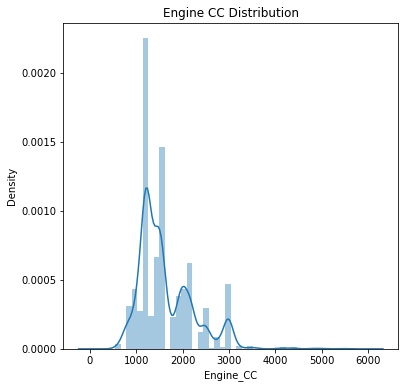

In [161]:
plt.figure(figsize=(6,6))
sns.distplot(df["Engine_CC"])
plt.title('Engine CC Distribution')
plt.show()

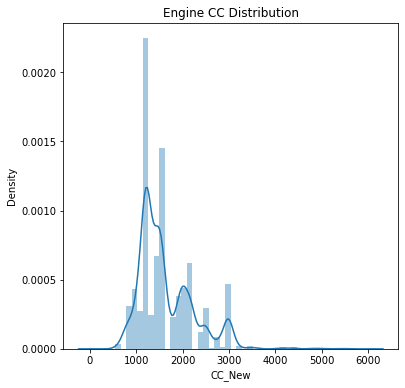

In [162]:
plt.figure(figsize=(6,6))
sns.distplot(df["CC_New"])
plt.title('Engine CC Distribution')
plt.show()

In [163]:
# plt.figure(figsize=(6,6))
# sns.distplot(df["Power_bhp"])
# plt.title('Power BHP Distribution')
# plt.show()
# sebelum di isi median

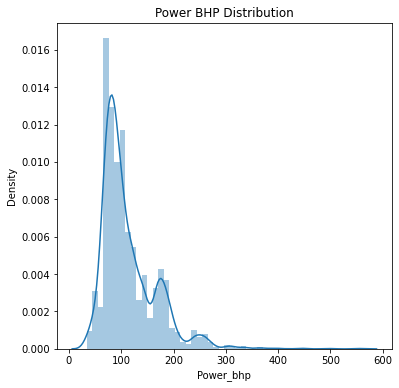

In [164]:
plt.figure(figsize=(6,6))
sns.distplot(df["Power_bhp"])
plt.title('Power BHP Distribution')
plt.show()

In [165]:
df.groupby(df["Fuel_Type"]).count()

,ID,Name,Location,Year,Kilometers_Driven,Transmission,Engine_CC,Power_bhp,Price,index,CC_New
Fuel_Type,,,,,,,,,,,
Diesel,3205,3205,3205,3205,3205,3205,3200,3205,3205,3205,3205
Electric,2,2,2,2,2,2,2,2,2,2,2
Petrol,2746,2746,2746,2746,2746,2746,2731,2746,2746,2746,2746


In [166]:
df[df["Fuel_Type"] == "Electric"]

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine_CC,Power_bhp,Price,index,CC_New
4394,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,72.0,41.0,13.00,4395,72.0
4850,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,1798.0,73.0,12.75,4851,1798.0


In [167]:
df1 = df.groupby(["Location"]).mean()["Price"]
df1

Location
Ahmedabad      8.531312
Bangalore     13.328631
Chennai        7.768476
Coimbatore    15.078223
Delhi          9.830846
Hyderabad      9.864393
Jaipur         5.825036
Kochi         11.264852
Kolkata        5.661215
Mumbai         9.556619
Pune           6.815411
Name: Price, dtype: float64

In [168]:
# 1. Penjualan Mobil terbanyak dan terendah
df1 = df.groupby(["Location"]).count().sort_values("ID", ascending=False)
df1.drop(columns= ["Name", "Year", "Kilometers_Driven", "Fuel_Type", "Transmission", "Engine_CC", "Power_bhp", "Price", "index", "CC_New"], inplace=True)


In [169]:
df1.rename(columns={"ID":"Jumlah_Mobil"}, inplace=True)
df1

,Jumlah_Mobil
Location,
Mumbai,772
Hyderabad,733
Kochi,643
Coimbatore,636
Pune,608
Delhi,544
Kolkata,535
Chennai,492
Jaipur,411


## Penjualan Mobil Terbanyak dan Terendah
- Penjualan mobil bekas di India terbanyak terjadi di Kota Mumbai
- sedangkan penjualan terkecil/terendah ada di Kota Ahmedabad.

Rekomendasi:
- Menambah/meningkatkan kegiatan marketing di kota Ahmedabad

    - Pro : 
        - Meningkatkan Awareness terhadap brand yang kita miliki
        - Meningkatkan Sales di Kota Ahmedabad

    - Kontra : 
        - Meningkatkan beban atau biaya operasional perusahaan
        - Peningkatan sales atau revenue belum pasti/tidak sebanding dengan beban yang dikeluarkan. 

Alternatif:
- Menghentikan kegiatan penjualan di kota Ahmedabad
    - Pro : Biaya Operasional berkurang atau dapat ditekan. 
    - Kontra : Kehilangan market di kota Ahmedabad


- Fokus Ke Kota memiliki demand atau penjualan tinggi
    - Pro : Kegiatan Marketing jauh lebih efektif
    - Kontra : Kehilangan market di kota Ahmedabad


sumber : https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population

sumber : https://timesofindia.indiatimes.com/city/ahmedabad/city-has-just-0-54m-of-road-per-vehicle/articleshow/74250328.cms


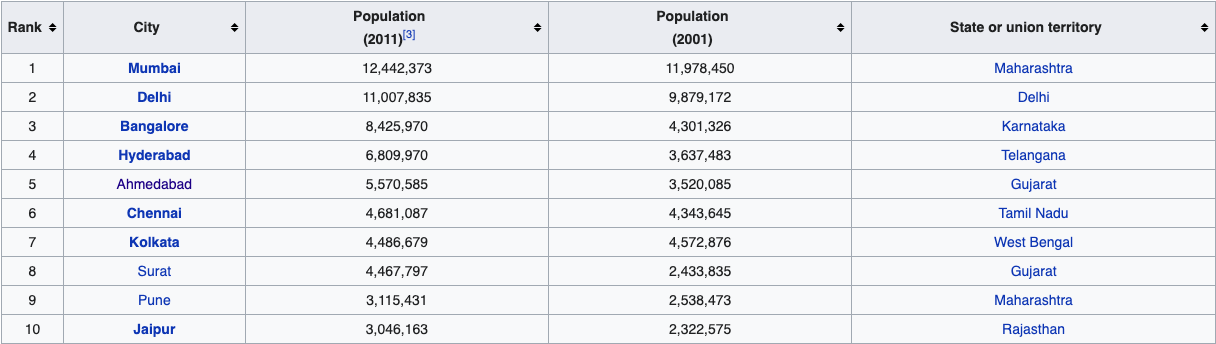

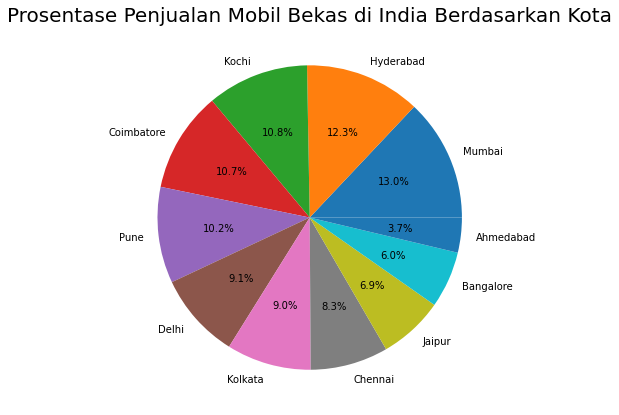

In [170]:
label = df1.index
data = df1["Jumlah_Mobil"]
plt.figure(figsize= (8,7))
plt.pie(data, labels= label, autopct='%1.1f%%')
plt.title("Prosentase Penjualan Mobil Bekas di India Berdasarkan Kota", size = 20)
plt.show()

In [171]:
df.set_index("index", inplace=True)

In [172]:
df

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine_CC,Power_bhp,Price,CC_New
index,,,,,,,,,,,
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1582.0,126.20,12.50,1582.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1199.0,88.70,4.50,1199.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1248.0,88.76,6.00,1248.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,1968.0,140.80,17.74,1968.0
5,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,1461.0,63.10,3.50,1461.0
...,...,...,...,...,...,...,...,...,...,...,...
5949,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,1248.0,74.00,4.75,1248.0
5950,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,1120.0,71.00,4.00,1120.0
5951,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,2498.0,112.00,2.90,2498.0


In [173]:
df.drop(columns="ID", inplace=True)

In [92]:
# df.to_csv("carpriceclean.csv")

In [174]:
df.isnull().any()

Name                 False
Location             False
Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Engine_CC             True
Power_bhp            False
Price                False
CC_New               False
dtype: bool

In [175]:
def brand(x,y):
    hasil = []
    for i in range (len(df[y])):
        hasil.append(x[y].iloc[i].split(" ")[0].title())
    return hasil

In [176]:
Brand = brand(df,"Name")

In [177]:
Brand

['Hyundai',
 'Honda',
 'Maruti',
 'Audi',
 'Nissan',
 'Toyota',
 'Volkswagen',
 'Tata',
 'Maruti',
 'Honda',
 'Maruti',
 'Land',
 'Land',
 'Mitsubishi',
 'Honda',
 'Maruti',
 'Renault',
 'Mercedes-Benz',
 'Bmw',
 'Maruti',
 'Audi',
 'Hyundai',
 'Volkswagen',
 'Honda',
 'Nissan',
 'Maruti',
 'Honda',
 'Toyota',
 'Renault',
 'Toyota',
 'Mahindra',
 'Audi',
 'Volkswagen',
 'Maruti',
 'Maruti',
 'Mahindra',
 'Mercedes-Benz',
 'Volkswagen',
 'Maruti',
 'Tata',
 'Mahindra',
 'Hyundai',
 'Hyundai',
 'Toyota',
 'Hyundai',
 'Toyota',
 'Hyundai',
 'Mahindra',
 'Audi',
 'Maruti',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Volkswagen',
 'Renault',
 'Hyundai',
 'Nissan',
 'Maruti',
 'Toyota',
 'Ford',
 'Mercedes-Benz',
 'Mercedes-Benz',
 'Tata',
 'Audi',
 'Honda',
 'Mercedes-Benz',
 'Maruti',
 'Hyundai',
 'Porsche',
 'Mahindra',
 'Hyundai',
 'Nissan',
 'Honda',
 'Audi',
 'Ford',
 'Toyota',
 'Toyota',
 'Hyundai',
 'Maruti',
 'Tata',
 'Honda',
 'Ford',
 'Maruti',
 'Honda',
 'Bmw',
 'Hyundai',
 'Hyundai',
 '

In [178]:
for i in range (len(Brand)):
    if Brand[i] == "Land":
        Brand[i] = "Land Rover"

In [179]:
df["Brand"] = Brand

In [180]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine_CC,Power_bhp,Price,CC_New,Brand
index,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1582.0,126.20,12.50,1582.0,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1199.0,88.70,4.50,1199.0,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1248.0,88.76,6.00,1248.0,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,1968.0,140.80,17.74,1968.0,Audi
5,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,1461.0,63.10,3.50,1461.0,Nissan
...,...,...,...,...,...,...,...,...,...,...,...
5949,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,1248.0,74.00,4.75,1248.0,Maruti
5950,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,1120.0,71.00,4.00,1120.0,Hyundai
5951,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,2498.0,112.00,2.90,2498.0,Mahindra


In [181]:
# 2
# 15 penjualan mobil bekas terbanyak berdasarkan brand dan tahun produksi
# Asumsi penjualan tahun 2021
df.groupby(["Brand", "Year"]).count()[["Name"]].sort_values("Name", ascending=False).head(15)

Name
Brand   Year      
Maruti  2016   179
Hyundai 2016   155
Maruti  2015   145
Hyundai 2015   142
Maruti  2014   137
        2017   128
Hyundai 2017   122
        2014   121
        2012   106
Honda   2014   105
Hyundai 2013   102
Maruti  2013    95
        2012    92
Honda   2015    84
        2016    77

In [182]:
# 15 penjualan mobil bekas terendah berdasarkan brand dan tahun produksi
# Asumsi penjualan tahun 2021
df.groupby(["Brand", "Year"]).count()[["Name"]].sort_values("Name").head(15)

Name
Brand         Year      
Ambassador    2003     1
Mitsubishi    2001     1
Mini          2019     1
              2018     1
Mercedes-Benz 2003     1
              2001     1
              1998     1
Maruti        1999     1
Mahindra      2002     1
              2000     1
Land Rover    2003     1
Lamborghini   2011     1
Jeep          2019     1
Isuzu         2018     1
Honda         2001     1

## Penjualan Berdasarkan Brand dan Tahun Produksi Mobil
- Penjualan terbanyak didominasi oleh brand Hyundai dan Maruti dengan tahun produksi 2010-an.
- Brand kelas premium kurang diminati oleh market India
- Mobil dengan tahun produksi dibawah 2010

Rekomendasi: 
- Fokus penjualan dan marketing ke mobil dengan brand Hyundai, Maruti, dan Honda dengan tahun diatas 2010.
  - Pro : Peningkatan Revenue dari brand-brand yang memiliki demand tinggi seperti hyundai dan maruti.<br>Kegiatan marketing lebih efisien dan efektif. 
  - Kontra : Penjualan mobil kelas premium dan mobil tahun produksi dibawah tahun 2010 menurun.

Alternatif:
- Pengurangan pembelian mobil kelas premium dan mobil dengan tahun produksi dibawah tahun 2010.
    - Pro : Cash flow perusahaan lancar karena tidak terdapat stok mobil yang tidak terjual. 
    - Kontra : Penjualan mobil dengan kelas premium dan tahun dibawah 2010 tidak meningkat.


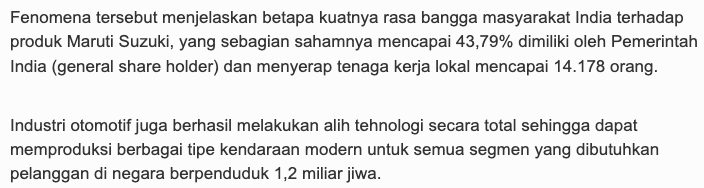

sumber : https://otomotif.bisnis.com/read/20180226/275/743229/ini-ternyata-maruti-suzuki-dominasi-pasar-india

In [183]:
# 3 Pengelompokan berdasarkan kilometer 
dfkilo = df["Kilometers_Driven"].apply(lambda x: "Low" if x < 50000 else
                              ("Middle" if 50000 <= x < 100000 else
                              "High"))

In [184]:
df["Class_Kilometers_Driven"] = dfkilo

In [185]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine_CC,Power_bhp,Price,CC_New,Brand,Class_Kilometers_Driven
index,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1582.0,126.20,12.50,1582.0,Hyundai,Low
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1199.0,88.70,4.50,1199.0,Honda,Low
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1248.0,88.76,6.00,1248.0,Maruti,Middle
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,1968.0,140.80,17.74,1968.0,Audi,Low
5,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,1461.0,63.10,3.50,1461.0,Nissan,Middle


In [186]:
# < 1000
# 1000 - 1800
# 1800 - 3000
# 3000 > 

In [187]:
Class_Engine = []
for i in range (len(df)):
    if df["CC_New"].iloc[i] <= 1000:
        Class_Engine.append("< 1000")
    elif 1000 < df["CC_New"].iloc[i] <= 1800:
        Class_Engine.append("1000 - 1800")
    elif 1800 < df["CC_New"].iloc[i] <= 3000:
        Class_Engine.append("1800 - 3000")
    else:
        Class_Engine.append("> 3000")

In [188]:
Class_Engine

['1000 - 1800',
 '1000 - 1800',
 '1000 - 1800',
 '1800 - 3000',
 '1000 - 1800',
 '1800 - 3000',
 '1000 - 1800',
 '1000 - 1800',
 '1000 - 1800',
 '1000 - 1800',
 '1000 - 1800',
 '1800 - 3000',
 '1800 - 3000',
 '1800 - 3000',
 '1000 - 1800',
 '1000 - 1800',
 '1000 - 1800',
 '1800 - 3000',
 '1800 - 3000',
 '1000 - 1800',
 '1800 - 3000',
 '1000 - 1800',
 '1000 - 1800',
 '1000 - 1800',
 '1000 - 1800',
 '< 1000',
 '1000 - 1800',
 '1800 - 3000',
 '1000 - 1800',
 '1000 - 1800',
 '1800 - 3000',
 '1800 - 3000',
 '1000 - 1800',
 '1000 - 1800',
 '1000 - 1800',
 '1000 - 1800',
 '1800 - 3000',
 '1000 - 1800',
 '< 1000',
 '< 1000',
 '1000 - 1800',
 '1000 - 1800',
 '1800 - 3000',
 '1000 - 1800',
 '1800 - 3000',
 '1800 - 3000',
 '1000 - 1800',
 '1800 - 3000',
 '1800 - 3000',
 '1000 - 1800',
 '1000 - 1800',
 '1000 - 1800',
 '1000 - 1800',
 '1000 - 1800',
 '< 1000',
 '1000 - 1800',
 '1800 - 3000',
 '< 1000',
 '1800 - 3000',
 '1000 - 1800',
 '1000 - 1800',
 '1800 - 3000',
 '1000 - 1800',
 '1800 - 3000',
 

In [189]:
df["Class_Engine"] = Class_Engine

In [190]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine_CC,Power_bhp,Price,CC_New,Brand,Class_Kilometers_Driven,Class_Engine
index,,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1582.0,126.20,12.50,1582.0,Hyundai,Low,1000 - 1800
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1199.0,88.70,4.50,1199.0,Honda,Low,1000 - 1800
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1248.0,88.76,6.00,1248.0,Maruti,Middle,1000 - 1800
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,1968.0,140.80,17.74,1968.0,Audi,Low,1800 - 3000
5,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,1461.0,63.10,3.50,1461.0,Nissan,Middle,1000 - 1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,1248.0,74.00,4.75,1248.0,Maruti,Low,1000 - 1800
5950,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,1120.0,71.00,4.00,1120.0,Hyundai,High,1000 - 1800
5951,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,2498.0,112.00,2.90,2498.0,Mahindra,Middle,1800 - 3000


In [191]:
dfprice = df.groupby(["Fuel_Type", "Transmission", "Class_Kilometers_Driven", "Class_Engine"])[["Price"]].mean()

In [192]:
dfprice.rename(columns={"Price":"AVG_Price"}, inplace=True)

In [193]:
dfprice

AVG_Price
Fuel_Type Transmission Class_Kilometers_Driven Class_Engine           
Diesel    Automatic    High                    1000 - 1800    6.083333
                                               1800 - 3000   16.262658
                                               < 1000         3.000000
                       Low                     1000 - 1800   12.012407
                                               1800 - 3000   31.363404
                                               > 3000        35.622000
                       Middle                  1000 - 1800    8.458824
                                               1800 - 3000   20.607563
                                               > 3000        44.230526
          Manual       High                    1000 - 1800    3.691389
                                               1800 - 3000    8.460812
                                               < 1000         1.500000
                                               > 3000         7.500000
                       Low                     1000 - 1800    6.796749
                                               1800 - 3000   13.631786
                                               < 1000         3.062500
                       Middle                  1000 - 1800    5.187618
                                               1800 - 3000    9.026096
                                               < 1000         2.553125
Electric  Automatic    Low                     1000 - 1800   12.750000
                       Middle                  < 1000        13.000000
Petrol    Automatic    High                    1000 - 1800    3.257500
                                               1800 - 3000    5.581818
                                               > 3000        13.425000
                       Low                     1000 - 1800    9.038511
                                               1800 - 3000   27.670000
                                               < 1000         4.111346
                                               > 3000        50.872353
                       Middle                  1000 - 1800    6.666269
                                               1800 - 3000    9.695179
                                               < 1000         3.835333
                                               > 3000        13.443636
          Manual       High                    1000 - 1800    2.250366
                                               1800 - 3000    5.072000
                                               < 1000         1.261333
                       Low                     1000 - 1800    5.262385
                                               1800 - 3000    9.758333
                                               < 1000         3.122966
                                               > 3000        40.000000
                       Middle                  1000 - 1800    3.482160
                                               1800 - 3000    6.174286
                                               < 1000         2.238122
                                               > 3000        40.880000

In [194]:
dfbaru = pd.merge(df,dfprice,on=["Fuel_Type", "Transmission", "Class_Kilometers_Driven", "Class_Engine"])

In [195]:
dfbaru.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine_CC,Power_bhp,Price,CC_New,Brand,Class_Kilometers_Driven,Class_Engine,AVG_Price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1582.0,126.2,12.50,1582.0,Hyundai,Low,1000 - 1800,6.796749
1,Maruti Swift DDiS VDI,Jaipur,2017,25000,Diesel,Manual,1248.0,74.0,5.99,1248.0,Maruti,Low,1000 - 1800,6.796749
2,Mahindra KUV 100 mFALCON D75 K8 Dual Tone,Coimbatore,2017,22033,Diesel,Manual,1198.0,77.0,5.58,1198.0,Mahindra,Low,1000 - 1800,6.796749
3,Hyundai Creta 1.4 E Plus Diesel,Mumbai,2018,13000,Diesel,Manual,1396.0,88.7,10.50,1396.0,Hyundai,Low,1000 - 1800,6.796749
4,Honda Amaze SX i-DTEC,Kolkata,2015,30000,Diesel,Manual,1498.0,98.6,3.50,1498.0,Honda,Low,1000 - 1800,6.796749


In [212]:
dfbaru['Class_Price'] = np.select([dfbaru['Price'] < dfbaru['AVG_Price'], dfbaru['Price'] == dfbaru['AVG_Price'],dfbaru['Price']>dfbaru['AVG_Price']],['Low','Average','High'])
dfbaru.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine_CC,Power_bhp,Price,CC_New,Brand,Class_Kilometers_Driven,Class_Engine,AVG_Price,Class_Price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1582.0,126.2,12.50,1582.0,Hyundai,Low,1000 - 1800,6.796749,High
1,Maruti Swift DDiS VDI,Jaipur,2017,25000,Diesel,Manual,1248.0,74.0,5.99,1248.0,Maruti,Low,1000 - 1800,6.796749,Low
2,Mahindra KUV 100 mFALCON D75 K8 Dual Tone,Coimbatore,2017,22033,Diesel,Manual,1198.0,77.0,5.58,1198.0,Mahindra,Low,1000 - 1800,6.796749,Low
3,Hyundai Creta 1.4 E Plus Diesel,Mumbai,2018,13000,Diesel,Manual,1396.0,88.7,10.50,1396.0,Hyundai,Low,1000 - 1800,6.796749,High
4,Honda Amaze SX i-DTEC,Kolkata,2015,30000,Diesel,Manual,1498.0,98.6,3.50,1498.0,Honda,Low,1000 - 1800,6.796749,Low


In [214]:
dfbaru.groupby(["Class_Price"]).count()[["Name"]]

,Name
Class_Price,
Average,7
High,2610
Low,3336


## Pengelompokan Harga Wajar berdasarkan Tipe Bahan Bakar, Transmisi, Kelas Jarak Tempuh Kilometer, Kelas Kapasitas Mesin
- Didapatkan nilai harga wajar untuk tiap mobil berdasarkan Tipe Bahan Bakar, Transmisi, Kelas Jarak Tempuh Kilometer, Kelas Kapasitas Mesin.

Rekomendasi:
- Memberikan informasi harga wajar kepada konsumen.
    - Pro : - Meningkatkan kepercayaan konsumen terhadap brand kami.
    - Kontra : - Konsumen menjadi lebih selektif terhadap pembelian mobil.

Alternatif:
- Menghindari pembelian mobil dengan harga tidak wajar.
    - Pro : - Data bisa menjadi acuan untuk menghindari pembelian stok mobil dengan harga tidak wajar.
    - Kontra : - Pencarian stok mobil menjadi lebih sulit dan selektif

In [197]:
# 4
# Melihat rata-rata seberapa jauh mobil dikendarai berdasarkan brand 
a = df.groupby(["Brand"]).sum()[["Kilometers_Driven",]].sort_values("Kilometers_Driven",ascending=False)

In [198]:
b = df.groupby(["Brand"]).mean()[["Kilometers_Driven",]].sort_values("Kilometers_Driven",ascending=False)

In [199]:
b.rename(columns={"Kilometers_Driven":"AVG_Kilometers_Driven"}, inplace=True)

In [200]:
c = df.groupby(["Brand"]).count()[["Name"]]

In [201]:
d = pd.concat([a,b,c], axis=1)

In [202]:
d.sort_values("AVG_Kilometers_Driven", ascending=False)

,Kilometers_Driven,AVG_Kilometers_Driven,Name
Brand,,,
Smart,103000,103000.000000,1
Toyota,34314045,83692.792683,410
Mitsubishi,2220767,82250.629630,27
Ambassador,80000,80000.000000,1
Bmw,21223660,79489.363296,267
Volvo,1481333,70539.666667,21
Fiat,1954326,69797.357143,28
Mahindra,18814873,69172.327206,272
Skoda,11852085,68509.161850,173


## Rata-Rata Jarak Tempuh Mobil Berdasarkan Brand
- Dapat dilhat bahwa konsumen lebih memilih mobil dengan jarak tempuh lebih kecil.


Rekomendasi:
- Pengurangan margin keuntungan pada brand mobil dengan jarak tempuh tinggi.
    - Pro :- Cash flow perusahaan dapat lebih lancar.
    - Kontra :- Persentase revenue per mobil dengan jarak tempuh tinggi cenderung kecil.


Alternatif:
- Memberikan biaya inspeksi gratis terhadap mobil dengan jarak tempuh tinggi.
    - Pro :- Kepercayaan konsumen untuk memilih mobil dengan jarak tempuh tingg meningkat.
    - Kontra:- Meningkatkan operasional untuk layanan inspeksi gratis.

In [203]:
# 5 
# Melihat preferensi transmisi dan fueltype berdasarkan kota 

In [204]:
df5 = df.groupby(["Location", "Fuel_Type", "Transmission"]).describe(include="O")["Brand"].sort_values(by=["Location","count"], ascending=False)

In [205]:
df6 = df.groupby(["Transmission","Location", "Fuel_Type"]).mean()[["Price"]]

In [206]:
df7 = pd.merge(df6,df5, on=["Transmission", "Location", "Fuel_Type"])

In [207]:
df7.rename(columns={"Price":"AVG_Price"}, inplace=True)

In [208]:
df5

count unique            top freq
Location   Fuel_Type Transmission                                 
Pune       Petrol    Manual         259     16         Maruti   75
           Diesel    Manual         205     16         Maruti   53
                     Automatic       83     16            Bmw   20
           Petrol    Automatic       61     11          Honda   15
Mumbai     Petrol    Manual         302     14         Maruti   83
           Diesel    Manual         167     15         Toyota   30
           Petrol    Automatic      156     16          Honda   35
           Diesel    Automatic      146     15            Bmw   46
           Electric  Automatic        1      1         Toyota    1
Kolkata    Petrol    Manual         243     14        Hyundai   80
           Diesel    Manual         212     16         Maruti   52
                     Automatic       44      9           Audi   14
           Petrol    Automatic       36     13  Mercedes-Benz   10
Kochi      Petrol    Manual         257     15        Hyundai   88
           Diesel    Manual         181     15        Hyundai   36
                     Automatic      123     17  Mercedes-Benz   24
           Petrol    Automatic       82     14          Honda   20
Jaipur     Diesel    Manual         195     17         Maruti   52
           Petrol    Manual         164     13         Maruti   57
           Diesel    Automatic       35     15  Mercedes-Benz    9
           Petrol    Automatic       17      6          Honda    6
Hyderabad  Diesel    Manual         358     15         Maruti   84
           Petrol    Manual         179     16         Maruti   72
           Diesel    Automatic      148     18            Bmw   32
           Petrol    Automatic       48     11         Maruti   14
Delhi      Diesel    Manual         189     13         Maruti   51
           Petrol    Manual         184     13        Hyundai   53
           Diesel    Automatic      117     14           Audi   24
           Petrol    Automatic       54     12  Mercedes-Benz   12
Coimbatore Petrol    Manual         208     16        Hyundai   79
           Diesel    Manual         181     17       Mahindra   33
                     Automatic      175     18           Audi   50
           Petrol    Automatic       72     14        Hyundai   23
Chennai    Diesel    Manual         207     17         Maruti   34
           Petrol    Manual         165     15         Maruti   50
           Diesel    Automatic       82     12            Bmw   27
           Petrol    Automatic       37      9         Maruti    9
           Electric  Automatic        1      1       Mahindra    1
Bangalore  Diesel    Automatic      110     15           Audi   32
                     Manual         109     14        Hyundai   19
           Petrol    Manual         105     11        Hyundai   44
                     Automatic       34     10        Hyundai   10
Ahmedabad  Diesel    Manual          93     13         Maruti   22
           Petrol    Manual          70      8         Maruti   24
           Diesel    Automatic       45     11            Bmw   15
           Petrol    Automatic       13      8        Hyundai    5

In [209]:
df7

AVG_Price count unique            top freq
Transmission Location   Fuel_Type                                            
Automatic    Ahmedabad  Diesel     19.639333    45     11            Bmw   15
                        Petrol      7.139231    13      8        Hyundai    5
             Bangalore  Diesel     27.029364   110     15           Audi   32
                        Petrol     15.205000    34     10        Hyundai   10
             Chennai    Diesel     22.292683    82     12            Bmw   27
                        Electric   13.000000     1      1       Mahindra    1
                        Petrol      6.587027    37      9         Maruti    9
             Coimbatore Diesel     32.204457   175     18           Audi   50
                        Petrol     13.141389    72     14        Hyundai   23
             Delhi      Diesel     22.714872   117     14           Audi   24
                        Petrol     14.202407    54     12  Mercedes-Benz   12
             Hyderabad  Diesel     24.912838   148     18            Bmw   32
                        Petrol     10.096875    48     11         Maruti   14
             Jaipur     Diesel     19.060000    35     15  Mercedes-Benz    9
                        Petrol      4.658824    17      6          Honda    6
             Kochi      Diesel     26.978130   123     17  Mercedes-Benz   24
                        Petrol     13.989024    82     14          Honda   20
             Kolkata    Diesel     15.936591    44      9           Audi   14
                        Petrol     14.978611    36     13  Mercedes-Benz   10
             Mumbai     Diesel     22.495822   146     15            Bmw   46
                        Electric   12.750000     1      1         Toyota    1
                        Petrol     10.023846   156     16          Honda   35
             Pune       Diesel     19.295422    83     16            Bmw   20
                        Petrol      7.988852    61     11          Honda   15
Manual       Ahmedabad  Diesel      6.611075    93     13         Maruti   22
                        Petrol      4.200143    70      8         Maruti   24
             Bangalore  Diesel      7.371651   109     14        Hyundai   19
                        Petrol      4.551810   105     11        Hyundai   44
             Chennai    Diesel      5.707150   207     17         Maruti   34
                        Petrol      3.369636   165     15         Maruti   50
             Coimbatore Diesel      9.669890   181     17       Mahindra   33
                        Petrol      6.045865   208     16        Hyundai   79
             Delhi      Diesel      6.264762   189     13         Maruti   51
                        Petrol      4.018315   184     13        Hyundai   53
             Hyderabad  Diesel      6.599162   358     15         Maruti   84
                        Petrol      3.890223   179     16         Maruti   72
             Jaipur     Diesel      5.972769   195     17         Maruti   52
                        Petrol      2.945732   164     13         Maruti   57
             Kochi      Diesel      7.726630   181     15        Hyundai   36
                        Petrol      5.367198   257     15        Hyundai   88
             Kolkata    Diesel      4.871840   212     16         Maruti   52
                        Petrol      3.108971   243     14        Hyundai   80
             Mumbai     Diesel      7.113473   167     15         Toyota   30
                        Petrol      4.400331   302     14         Maruti   83
             Pune       Diesel      6.027268   205     16         Maruti   53
                        Petrol      3.163475   259     16         Maruti   75

In [210]:
# perbandingan rata-rata harga mobil bekas manual dan matic di india 

# H0 : Rata-rata harga mobil manual == Rata-rata harga mobil matic

# Ha : Ada perbedaan rata-rata harga mobil manual dan matic di india 

from scipy.stats import ttest_ind

# two sample independent t-test 
result = list(ttest_ind(
                df[df["Transmission"] == "Automatic"]["Price"],
                df[df["Transmission"] == "Manual"]["Price"],
                equal_var = False))
print("T-statistic: ", result[0])
print("P-value: ", result[1])

# Conclusion 
if result [1] < 0.05:
    print("Tolak H0")
else:
    print("Terima H0")

T-statistic:  37.18835668874222
P-value:  8.572470606372055e-225
Tolak H0


In [211]:
df.groupby(["Transmission"]).mean()[["Price"]]

,Price
Transmission,
Automatic,19.843971
Manual,5.363449


## Preferensi Tipe Bahan Bakar dan Transmisi Mobil di Kota- Kota di India
- Penjualan mobil dengan transmisi manual lebih diminati, karena perbedaan harga jual mobil yang jauh lebih tinggi.


Rekomendasi
- Fokus terhadap penjualan mobil dengan transmisi manual dengan tipe bahan bakar petrol.
    - Pro :- Peningkatan penjualan untuk mobil dengan transmisi manual dan tipe bahan bakar petrol.
    - Kontra :- Penjualan mobil diesel atau automatic dapat berkurang.


Alternatif
- Mengurangi margin keuntungan untuk mobil dengan tipe bahan bakar petrol.
    - Pro :- Memberikan preferensi kepada konsumen untuk membeli mobil dengan bahan bakar petrol.
    - Kontra:- Persentase keuntungan per mobil dengan tipe bahan bakar petrol berkurang.

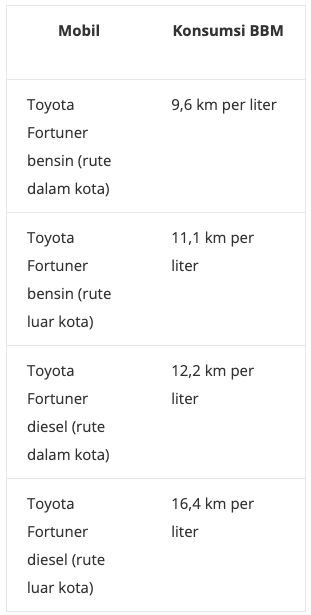
sumber : https://www.carmudi.co.id/journal/perbandingan-konsumsi-bbm-toyota-fortuner-bensin-dan-diesel/